# Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
df=pd.read_csv("C:\\Users\\saran\\OneDrive\\Desktop\\algerian forest fire\\Algerian_forest_fires_dataset_UPDATE.csv")

In [330]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


# data cleaning

In [332]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [333]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [334]:
df.dropna(inplace=True)

In [335]:
df.reset_index(drop=True,inplace=True)

In [336]:
df.columns=df.columns.str.strip()

In [337]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [338]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [339]:
df.reset_index(drop=True)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [340]:
df.Classes=df.Classes.apply(lambda x: x.strip())

In [341]:
df.Classes.unique()

array(['not fire', 'fire', 'Classes'], dtype=object)

In [342]:
df.Classes=df.Classes.map({'not fire':0, 'fire':1})

In [343]:
df.drop(df[df.Temperature=="Temperature"].index,inplace=True)

In [344]:
for i in df.columns:
    if i!="Classes":
        df[i]=df[i].astype("float")

In [345]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0.0


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    float64
 11  Region       243 non-null    float64
dtypes: float64(12)
memory usage: 24.7 KB


In [347]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


# feature selection

<Axes: >

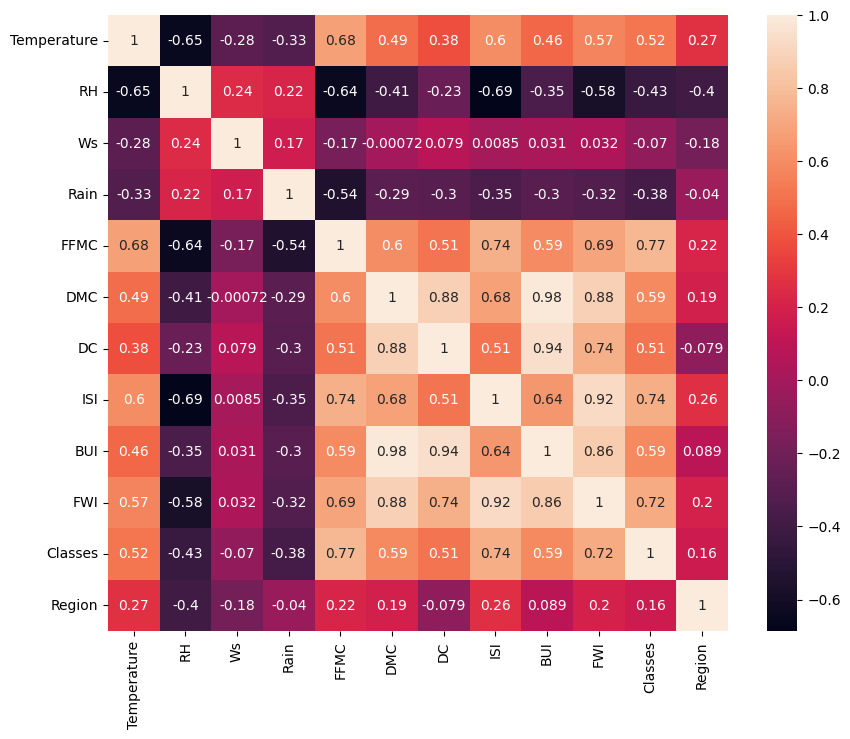

In [348]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [349]:
X=df.drop("Classes",axis=1)
Y=df.Classes

In [350]:
X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102


In [351]:
def correlation(data,threshold):
    col_names=set()
    corr_metrix=data.corr()
    for i in range(len(data.columns)):
        for j in range(i):
            if corr_metrix.iloc[i,j]>threshold:
                col_names.add(corr_metrix.columns[i])
                break 
    return col_names            

In [352]:
corr_features=correlation(df,0.85)
corr_features

{'BUI', 'DC', 'FWI'}

In [353]:
X.drop(['BUI', 'DC', 'FWI'],axis=1,inplace=True)

In [354]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,1.3,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,1.0,0.0
2,26.0,82.0,22.0,13.1,47.1,2.5,0.3,0.0
3,25.0,89.0,13.0,2.5,28.6,1.3,0.0,0.0
4,27.0,77.0,16.0,0.0,64.8,3.0,1.2,0.0


# feature scaling and standrisation

In [355]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [356]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<Axes: >

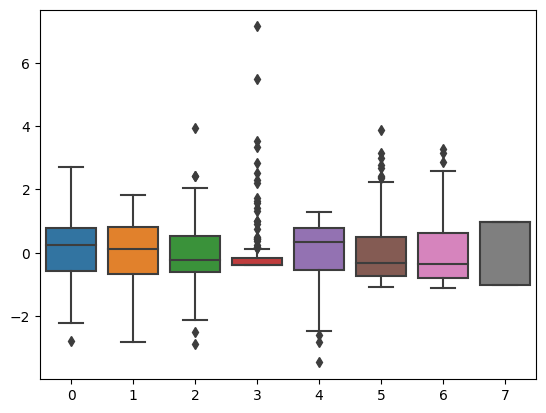

In [357]:
sns.boxplot(X_train)

# linear regression model

In [362]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
regressor1=LinearRegression()
regressor1.fit(X_train,Y_train)
Y_predict=regressor1.predict(X_test)
MAE=mean_absolute_error(Y_test,Y_predict)
score=r2_score(Y_test,Y_predict)
print("Mean absolute error :",MAE)
print("R2 Score :",score)

Mean absolute error : 0.24126567807088037
R2 Score : 0.6718675051625929


# Lasso Regression

In [363]:
from sklearn.linear_model import Lasso
regressor2=Lasso()
regressor2.fit(X_train,Y_train)
Y_predict=regressor2.predict(X_test)
MAE=mean_absolute_error(Y_test,Y_predict)
score=r2_score(Y_test,Y_predict)
print("Mean absolute error :",MAE)
print("R2 Score :",score)

Mean absolute error : 0.49085505258344764
R2 Score : -0.007733585858585634


# ridge regression

In [364]:
from sklearn.linear_model import Ridge
regressor3=Ridge()
regressor3.fit(X_train,Y_train)
Y_predict=regressor3.predict(X_test)
MAE=mean_absolute_error(Y_test,Y_predict)
score=r2_score(Y_test,Y_predict)
print("Mean absolute error :",MAE)
print("R2 Score :",score)

Mean absolute error : 0.24208655110617036
R2 Score : 0.671130444096018


# elastic net regression

In [365]:
from sklearn.linear_model import ElasticNet
regressor4=ElasticNet()
regressor4.fit(X_train,Y_train)
Y_predict=regressor4.predict(X_test)
MAE=mean_absolute_error(Y_test,Y_predict)
score=r2_score(Y_test,Y_predict)
print("Mean absolute error :",MAE)
print("R2 Score :",score)

Mean absolute error : 0.49085505258344764
R2 Score : -0.007733585858585634


In [366]:
import pickle
pickle.dump(scaler,open("scaler.pkl",'wb'))
pickle.dump(regressor3,open("regressor.pkl","wb"))